An example of embedding a scikit-learn classifier in a RooAbsReal
by Kyle Cranmer

see:
https://github.com/cranmer/parametrized-learning/tree/master/SciKitLearnWrapper
for the c++ code, Makefile, and pkl file used here

see also a standalone version:
https://github.com/cranmer/roofit-python-wrapper

In [1]:
from ROOT import TCanvas, gSystem, RooRealVar
from ROOT import RooFit
import ROOT


import numpy as np
from sklearn import svm
from sklearn.externals import joblib

/Users/cranmer/projects/roostats/root-v5-34/lib/ROOT.py:301: UserWarning: Module readline was already imported from /System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-dynload/readline.so, but /Library/Python/2.7/site-packages is being added to sys.path
  return _orig_ihook( name, *args, **kwds )


Welcome to ROOTaaS 6.05/03

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



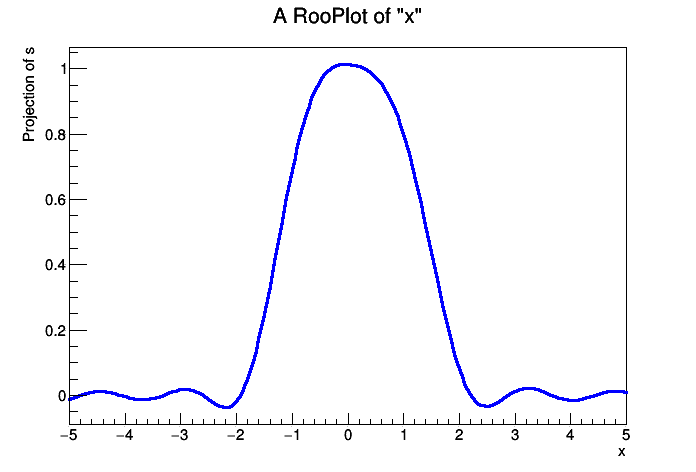

In [2]:
def scikitlearnFunc(x=0.):
    clf = joblib.load('../adaptive.pkl') 
    traindata = np.array((x,0.))
    outputs=clf.predict(traindata)
    return outputs[0]

def scikitlearnTest():
    gSystem.Load( 'libSciKitLearnWrapper' )	
    x = RooRealVar('x','x',0.2,-5,5)	
    s = ROOT.SciKitLearnWrapper('s','s',x)
    s.RegisterCallBack( scikitlearnFunc );

    c1 = TCanvas('c1')
    frame = x.frame()
    s.plotOn(frame)
    frame.Draw()
    #c1.SaveAs('scikitlearn-wrapper-plot.pdf')
    c1.Draw()

if __name__ == '__main__':
    scikitlearnTest()